In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
combinado2018 = pd.read_csv('data/tablas/combinado2018.csv', sep=';')

In [3]:
# PROM_GRAL change , for . the datatyope is float
combinado2018['PROM_GRAL'] = combinado2018['PROM_GRAL'].str.replace(',', '.').astype(float)

In [4]:
# Convertir 'FEC_NAC_ALU' a una cadena
combinado2018['FEC_NAC_ALU'] = combinado2018['FEC_NAC_ALU'].astype(str)

# Asegurarse de que la cadena tiene el formato correcto (YYYYMM)
combinado2018['FEC_NAC_ALU'] = combinado2018['FEC_NAC_ALU'].str.pad(width=6, side='left', fillchar='0')

# Convertir la cadena a un formato de fecha
combinado2018['FEC_NAC_ALU'] = pd.to_datetime(combinado2018['FEC_NAC_ALU'], format='%Y%m')

print(combinado2018['FEC_NAC_ALU'])

0         2001-04-01
1         2000-04-01
2         2001-09-01
3         2001-05-01
4         2001-07-01
             ...    
2893195   2002-07-01
2893196   2003-03-01
2893197   2001-11-01
2893198   2002-08-01
2893199   2003-06-01
Name: FEC_NAC_ALU, Length: 2893200, dtype: datetime64[ns]


In [5]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 39 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Unnamed: 0      int64         
 1   AGNO            int64         
 2   RBD             int64         
 3   DGV_RBD         int64         
 4   NOM_RBD         object        
 5   COD_REG_RBD     int64         
 6   NOM_REG_RBD_A   object        
 7   COD_PRO_RBD     int64         
 8   COD_COM_RBD     int64         
 9   NOM_COM_RBD     object        
 10  COD_DEPROV_RBD  int64         
 11  NOM_DEPROV_RBD  object        
 12  COD_DEPE        int64         
 13  COD_DEPE2       int64         
 14  RURAL_RBD       int64         
 15  ESTADO_ESTAB    int64         
 16  COD_ENSE        int64         
 17  COD_ENSE2       int64         
 18  COD_GRADO       int64         
 19  LET_CUR         object        
 20  COD_JOR         int64         
 21  COD_TIP_CUR     int64         
 22  COD_DES_CUR     in

In [6]:
# Drop Unnamed: 0      
combinado2018 = combinado2018.drop(['Unnamed: 0'], axis=1)

In [7]:
# Drop "NOM_RBD", "NOM_REG_RBD_A", "NOM_COM_RBD", "NOM_DEPROV_RBD", "LET_CUR", "NOM_COM_ALU", "SIT_FIN"
combinado2018 = combinado2018.drop(["NOM_RBD", "NOM_REG_RBD_A", "NOM_COM_RBD", "NOM_DEPROV_RBD", "LET_CUR", "NOM_COM_ALU", "SIT_FIN" ], axis=1)

In [8]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 31 columns):
 #   Column          Dtype         
---  ------          -----         
 0   AGNO            int64         
 1   RBD             int64         
 2   DGV_RBD         int64         
 3   COD_REG_RBD     int64         
 4   COD_PRO_RBD     int64         
 5   COD_COM_RBD     int64         
 6   COD_DEPROV_RBD  int64         
 7   COD_DEPE        int64         
 8   COD_DEPE2       int64         
 9   RURAL_RBD       int64         
 10  ESTADO_ESTAB    int64         
 11  COD_ENSE        int64         
 12  COD_ENSE2       int64         
 13  COD_GRADO       int64         
 14  COD_JOR         int64         
 15  COD_TIP_CUR     int64         
 16  COD_DES_CUR     int64         
 17  MRUN            int64         
 18  GEN_ALU         int64         
 19  FEC_NAC_ALU     datetime64[ns]
 20  EDAD_ALU        int64         
 21  COD_REG_ALU     int64         
 22  COD_COM_ALU     in

In [9]:
# Crear nuevas columnas para el año y el mes
combinado2018['AGNO_NAC_ALU'] = combinado2018['FEC_NAC_ALU'].dt.year
combinado2018['MES_NAC_ALU'] = combinado2018['FEC_NAC_ALU'].dt.month

# Eliminar la columna del día
combinado2018['FEC_NAC_ALU'] = combinado2018['FEC_NAC_ALU'].dt.to_period('M')

In [10]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 33 columns):
 #   Column          Dtype    
---  ------          -----    
 0   AGNO            int64    
 1   RBD             int64    
 2   DGV_RBD         int64    
 3   COD_REG_RBD     int64    
 4   COD_PRO_RBD     int64    
 5   COD_COM_RBD     int64    
 6   COD_DEPROV_RBD  int64    
 7   COD_DEPE        int64    
 8   COD_DEPE2       int64    
 9   RURAL_RBD       int64    
 10  ESTADO_ESTAB    int64    
 11  COD_ENSE        int64    
 12  COD_ENSE2       int64    
 13  COD_GRADO       int64    
 14  COD_JOR         int64    
 15  COD_TIP_CUR     int64    
 16  COD_DES_CUR     int64    
 17  MRUN            int64    
 18  GEN_ALU         int64    
 19  FEC_NAC_ALU     period[M]
 20  EDAD_ALU        int64    
 21  COD_REG_ALU     int64    
 22  COD_COM_ALU     int64    
 23  COD_RAMA        int64    
 24  COD_SEC         int64    
 25  COD_ESPE        int64    
 26  PROM_GRAL     

In [11]:
combinado2018['FEC_NAC_ALU']

0          2001-04
1          2000-04
2          2001-09
3          2001-05
4          2001-07
            ...   
2893195    2002-07
2893196    2003-03
2893197    2001-11
2893198    2002-08
2893199    2003-06
Name: FEC_NAC_ALU, Length: 2893200, dtype: period[M]

In [12]:
# Drop FEC_NAC_ALU
combinado2018 = combinado2018.drop(['FEC_NAC_ALU'], axis=1)

In [13]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 32 columns):
 #   Column          Dtype  
---  ------          -----  
 0   AGNO            int64  
 1   RBD             int64  
 2   DGV_RBD         int64  
 3   COD_REG_RBD     int64  
 4   COD_PRO_RBD     int64  
 5   COD_COM_RBD     int64  
 6   COD_DEPROV_RBD  int64  
 7   COD_DEPE        int64  
 8   COD_DEPE2       int64  
 9   RURAL_RBD       int64  
 10  ESTADO_ESTAB    int64  
 11  COD_ENSE        int64  
 12  COD_ENSE2       int64  
 13  COD_GRADO       int64  
 14  COD_JOR         int64  
 15  COD_TIP_CUR     int64  
 16  COD_DES_CUR     int64  
 17  MRUN            int64  
 18  GEN_ALU         int64  
 19  EDAD_ALU        int64  
 20  COD_REG_ALU     int64  
 21  COD_COM_ALU     int64  
 22  COD_RAMA        int64  
 23  COD_SEC         int64  
 24  COD_ESPE        int64  
 25  PROM_GRAL       float64
 26  ASISTENCIA      int64  
 27  SIT_FIN_R       object 
 28  DESERTOR    

In [14]:
combinado2018['SIT_FIN_R'].unique()

array(['R', 'T', 'Y', 'P', ' '], dtype=object)

In [15]:
combinado2018['SIT_FIN_R'].value_counts()

SIT_FIN_R
P    2569757
T     189897
R      79319
Y      53805
         422
Name: count, dtype: int64

In [16]:
# Eliminar valores nulos de 'SIT_FIN_R'
combinado2018 = combinado2018.dropna(subset=['SIT_FIN_R'])

In [17]:
combinado2018['SIT_FIN_R'].unique()

array(['R', 'T', 'Y', 'P', ' '], dtype=object)

In [18]:
import numpy as np

combinado2018['SIT_FIN_R'].replace(' ', np.nan, inplace=True)

In [19]:
most_common = combinado2018['SIT_FIN_R'].mode()[0]
combinado2018['SIT_FIN_R'] = combinado2018['SIT_FIN_R'].fillna(most_common)

In [20]:
combinado2018['SIT_FIN_R'] = combinado2018['SIT_FIN_R'].fillna('Unknown')

In [21]:
# Verificar valores nulos
combinado2018.isnull().sum()

AGNO                  0
RBD                   0
DGV_RBD               0
COD_REG_RBD           0
COD_PRO_RBD           0
COD_COM_RBD           0
COD_DEPROV_RBD        0
COD_DEPE              0
COD_DEPE2             0
RURAL_RBD             0
ESTADO_ESTAB          0
COD_ENSE              0
COD_ENSE2             0
COD_GRADO             0
COD_JOR               0
COD_TIP_CUR           0
COD_DES_CUR           0
MRUN                  0
GEN_ALU               0
EDAD_ALU              0
COD_REG_ALU           0
COD_COM_ALU           0
COD_RAMA              0
COD_SEC               0
COD_ESPE              0
PROM_GRAL             0
ASISTENCIA            0
SIT_FIN_R             0
DESERTOR              0
COD_MEN           79315
AGNO_NAC_ALU          0
MES_NAC_ALU           0
dtype: int64

In [22]:
# Drop COD_MEN
combinado2018 = combinado2018.drop(['COD_MEN'], axis=1)

In [23]:
# Dummies  de variable SIT_FIN_R
combinado2018 = pd.get_dummies(combinado2018, columns=['SIT_FIN_R'])

In [24]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 34 columns):
 #   Column          Dtype  
---  ------          -----  
 0   AGNO            int64  
 1   RBD             int64  
 2   DGV_RBD         int64  
 3   COD_REG_RBD     int64  
 4   COD_PRO_RBD     int64  
 5   COD_COM_RBD     int64  
 6   COD_DEPROV_RBD  int64  
 7   COD_DEPE        int64  
 8   COD_DEPE2       int64  
 9   RURAL_RBD       int64  
 10  ESTADO_ESTAB    int64  
 11  COD_ENSE        int64  
 12  COD_ENSE2       int64  
 13  COD_GRADO       int64  
 14  COD_JOR         int64  
 15  COD_TIP_CUR     int64  
 16  COD_DES_CUR     int64  
 17  MRUN            int64  
 18  GEN_ALU         int64  
 19  EDAD_ALU        int64  
 20  COD_REG_ALU     int64  
 21  COD_COM_ALU     int64  
 22  COD_RAMA        int64  
 23  COD_SEC         int64  
 24  COD_ESPE        int64  
 25  PROM_GRAL       float64
 26  ASISTENCIA      int64  
 27  DESERTOR        int64  
 28  AGNO_NAC_ALU

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [26]:
X = combinado2018.drop('DESERTOR', axis=1)
y = combinado2018['DESERTOR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
numeric_features = ['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD', 'COD_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'COD_REG_ALU', 'COD_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE','EDAD_ALU', 'PROM_GRAL', 'ASISTENCIA','AGNO_NAC_ALU', 'MES_NAC_ALU']  
categorical_features = ['SIT_FIN_R_P', 'SIT_FIN_R_R', 'SIT_FIN_R_T', 'SIT_FIN_R_Y']  

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [29]:
X.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD',
       'COD_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'COD_TIP_CUR',
       'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'EDAD_ALU', 'COD_REG_ALU',
       'COD_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL',
       'ASISTENCIA', 'AGNO_NAC_ALU', 'MES_NAC_ALU', 'SIT_FIN_R_P',
       'SIT_FIN_R_R', 'SIT_FIN_R_T', 'SIT_FIN_R_Y'],
      dtype='object')

In [30]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025240 entries, 1381675 to 2219110
Data columns (total 33 columns):
 #   Column          Dtype  
---  ------          -----  
 0   AGNO            int64  
 1   RBD             int64  
 2   DGV_RBD         int64  
 3   COD_REG_RBD     int64  
 4   COD_PRO_RBD     int64  
 5   COD_COM_RBD     int64  
 6   COD_DEPROV_RBD  int64  
 7   COD_DEPE        int64  
 8   COD_DEPE2       int64  
 9   RURAL_RBD       int64  
 10  ESTADO_ESTAB    int64  
 11  COD_ENSE        int64  
 12  COD_ENSE2       int64  
 13  COD_GRADO       int64  
 14  COD_JOR         int64  
 15  COD_TIP_CUR     int64  
 16  COD_DES_CUR     int64  
 17  MRUN            int64  
 18  GEN_ALU         int64  
 19  EDAD_ALU        int64  
 20  COD_REG_ALU     int64  
 21  COD_COM_ALU     int64  
 22  COD_RAMA        int64  
 23  COD_SEC         int64  
 24  COD_ESPE        int64  
 25  PROM_GRAL       float64
 26  ASISTENCIA      int64  
 27  AGNO_NAC_ALU    int32  
 28  MES_NAC_ALU

In [32]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 2025240 entries, 1381675 to 2219110
Series name: DESERTOR
Non-Null Count    Dtype
--------------    -----
2025240 non-null  int64
dtypes: int64(1)
memory usage: 30.9 MB


In [33]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGNO', 'RBD', 'DGV_RBD',
                                                   'COD_REG_RBD', 'COD_PRO_RBD',
                                                   'COD_COM_RBD',
                                                   'COD_DEPROV_RBD', 'COD_DEPE',
                                                   'COD_DEPE2', 'RURAL_RBD',
                                                   'ESTADO_ESTAB', 'COD_ENSE',
                                                   'COD_ENSE2', 'COD_GRADO',
                                                   'COD_JOR', 'COD_TIP_CUR',
                                                   'COD_DES_CUR', 'MRUN',
                                                   'GEN_ALU', 'COD_REG_ALU',
                                                   'COD_COM_ALU', 'COD_RAMA',
                                                   'COD_SEC', 'COD_ESPE',
                                                   'EDAD_ALU', 'PROM_GRAL',
                                                   'ASISTENCIA', 'AGNO_NAC_ALU',
                                                   'MES_NAC_ALU']),
                                                 ('cat', OneHotEncoder(),
                                                  ['SIT_FIN_R_P', 'SIT_FIN_R_R',
                                                   'SIT_FIN_R_T',
                                                   'SIT_FIN_R_Y'])])),
                ('classifier', RandomForestClassifier())])

In [34]:
import matplotlib.pyplot as plt

In [35]:
X_train.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD',
       'COD_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'COD_TIP_CUR',
       'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'EDAD_ALU', 'COD_REG_ALU',
       'COD_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL',
       'ASISTENCIA', 'AGNO_NAC_ALU', 'MES_NAC_ALU', 'SIT_FIN_R_P',
       'SIT_FIN_R_R', 'SIT_FIN_R_T', 'SIT_FIN_R_Y'],
      dtype='object')

In [36]:
X_test.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD',
       'COD_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'COD_TIP_CUR',
       'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'EDAD_ALU', 'COD_REG_ALU',
       'COD_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL',
       'ASISTENCIA', 'AGNO_NAC_ALU', 'MES_NAC_ALU', 'SIT_FIN_R_P',
       'SIT_FIN_R_R', 'SIT_FIN_R_T', 'SIT_FIN_R_Y'],
      dtype='object')

In [37]:
# Prediccion
y_pred = clf.predict(X_test)

# Matriz de confusion
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificacion
print(classification_report(y_test, y_pred))



[[844603      0]
 [     0  23357]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    844603
           1       1.00      1.00      1.00     23357

    accuracy                           1.00    867960
   macro avg       1.00      1.00      1.00    867960
weighted avg       1.00      1.00      1.00    867960



In [38]:
# Importancia de las variables
feature_names = X.columns
importances = clf.named_steps['classifier'].feature_importances_

In [39]:
print(clf.named_steps['classifier'])

RandomForestClassifier()


In [40]:
print(clf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGNO', 'RBD', 'DGV_RBD',
                                                   'COD_REG_RBD', 'COD_PRO_RBD',
                                                   'COD_COM_RBD',
                                                   'COD_DEPROV_RBD', 'COD_DEPE',
                                                   'COD_DEPE2', 'RURAL_RBD',
                                                   'ESTADO_ESTAB', 'COD_ENSE',
                                                   'COD_ENSE2', 'COD_GRADO',
                                                   'COD_JOR', 'COD_TIP_CUR',
                                                   'COD_DES_CUR', 'MRUN',
                                                   'GEN_ALU', 'COD_REG_ALU',
                                                   'COD_COM_ALU', 'COD_RAMA',
                                                

In [41]:
print(clf.named_steps['classifier'].feature_importances_)

[7.77801711e-01 1.92394936e-03 9.36557282e-04 3.51823158e-04
 6.26578210e-04 1.13466592e-03 9.86743935e-04 8.13705553e-04
 6.45910962e-04 1.28284687e-04 5.30070615e-05 2.59598860e-03
 3.20016637e-03 8.81587716e-03 3.34911904e-04 6.94731018e-05
 4.01211009e-04 1.61959335e-02 3.36851781e-04 4.29690011e-04
 1.23563118e-03 5.33348190e-04 3.66067070e-04 5.95296867e-04
 2.60892816e-02 1.18429268e-02 7.17226435e-03 4.39984768e-02
 4.64718255e-03 1.43236265e-02 1.07766424e-02 2.44904770e-03
 2.93533260e-03 3.74396561e-03 3.84999186e-03 1.91434930e-02
 2.85143845e-02]


In [42]:
print(importances)
print(feature_names)

[7.77801711e-01 1.92394936e-03 9.36557282e-04 3.51823158e-04
 6.26578210e-04 1.13466592e-03 9.86743935e-04 8.13705553e-04
 6.45910962e-04 1.28284687e-04 5.30070615e-05 2.59598860e-03
 3.20016637e-03 8.81587716e-03 3.34911904e-04 6.94731018e-05
 4.01211009e-04 1.61959335e-02 3.36851781e-04 4.29690011e-04
 1.23563118e-03 5.33348190e-04 3.66067070e-04 5.95296867e-04
 2.60892816e-02 1.18429268e-02 7.17226435e-03 4.39984768e-02
 4.64718255e-03 1.43236265e-02 1.07766424e-02 2.44904770e-03
 2.93533260e-03 3.74396561e-03 3.84999186e-03 1.91434930e-02
 2.85143845e-02]
Index(['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD',
       'COD_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'COD_TIP_CUR',
       'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'EDAD_ALU', 'COD_REG_ALU',
       'COD_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL',
       'ASISTENCIA', 'AGNO_NAC_ALU', 'MES_NAC_ALU', 'SIT_FIN_R_P',
 

In [43]:
feature_names = ['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD', 'COD_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'EDAD_ALU', 'COD_REG_ALU', 'COD_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL', 'ASISTENCIA', 'AGNO_NAC_ALU', 'MES_NAC_ALU', 'SIT_FIN_R_P', 'SIT_FIN_R_R', 'SIT_FIN_R_T', 'SIT_FIN_R_Y', '34', '35', '36', '37']

In [44]:

forest_importances = pd.Series(importances, index=feature_names)

In [45]:
print(forest_importances)

AGNO              0.777802
RBD               0.001924
DGV_RBD           0.000937
COD_REG_RBD       0.000352
COD_PRO_RBD       0.000627
COD_COM_RBD       0.001135
COD_DEPROV_RBD    0.000987
COD_DEPE          0.000814
COD_DEPE2         0.000646
RURAL_RBD         0.000128
ESTADO_ESTAB      0.000053
COD_ENSE          0.002596
COD_ENSE2         0.003200
COD_GRADO         0.008816
COD_JOR           0.000335
COD_TIP_CUR       0.000069
COD_DES_CUR       0.000401
MRUN              0.016196
GEN_ALU           0.000337
EDAD_ALU          0.000430
COD_REG_ALU       0.001236
COD_COM_ALU       0.000533
COD_RAMA          0.000366
COD_SEC           0.000595
COD_ESPE          0.026089
PROM_GRAL         0.011843
ASISTENCIA        0.007172
AGNO_NAC_ALU      0.043998
MES_NAC_ALU       0.004647
SIT_FIN_R_P       0.014324
SIT_FIN_R_R       0.010777
SIT_FIN_R_T       0.002449
SIT_FIN_R_Y       0.002935
34                0.003744
35                0.003850
36                0.019143
37                0.028514
d

"\n# Guardar grafico\nplt.savefig('graficos/variables_importancia.png')\n\n# Guardar modelo\nimport pickle\npickle.dump(clf, open('modelos/modelo.pkl', 'wb'))\n"

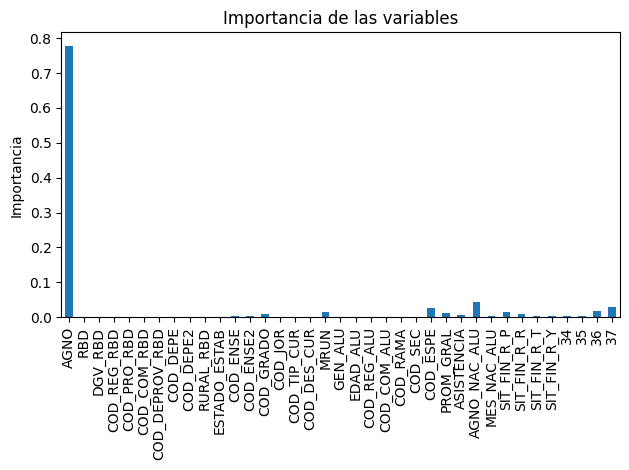

In [46]:


# Grafico de barras
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Importancia de las variables")
ax.set_ylabel("Importancia")
fig.tight_layout()

'''
# Guardar grafico
plt.savefig('graficos/variables_importancia.png')

# Guardar modelo
import pickle
pickle.dump(clf, open('modelos/modelo.pkl', 'wb'))
'''

In [47]:
# Regresion logistica
from sklearn.linear_model import LogisticRegression

clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

clf.fit(X_train, y_train)

# Prediccion
y_pred = clf.predict(X_test)

# Matriz de confusion
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificacion
print(classification_report(y_test, y_pred))

# Importancia de las variables
feature_names = X.columns
importances = clf.named_steps['classifier'].coef_[0]
forest_importances = pd.Series(importances, index=feature_names)

# Grafico de barras
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Importancia de las variables")
ax.set_ylabel("Importancia")
fig.tight_layout()


[[844603      0]
 [     0  23357]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    844603
           1       1.00      1.00      1.00     23357

    accuracy                           1.00    867960
   macro avg       1.00      1.00      1.00    867960
weighted avg       1.00      1.00      1.00    867960



ValueError: Length of values (37) does not match length of index (33)

In [ ]:
# Redes neuronales
from sklearn.neural_network import MLPClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MLPClassifier())])

clf.fit(X_train, y_train)

# Prediccion
y_pred = clf.predict(X_test)

# Matriz de confusion
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificacion
print(classification_report(y_test, y_pred))

# Importancia de las variables
feature_names = X.columns
importances = clf.named_steps['classifier'].coefs_[0]
forest_importances = pd.Series(importances, index=feature_names)

# Grafico de barras
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Importancia de las variables")
ax.set_ylabel("Importancia")
fig.tight_layout()


[[844603      0]
 [     0  23357]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    844603
           1       1.00      1.00      1.00     23357

    accuracy                           1.00    867960
   macro avg       1.00      1.00      1.00    867960
weighted avg       1.00      1.00      1.00    867960



ValueError: Length of values (37) does not match length of index (33)